<a href="https://colab.research.google.com/github/b-bella99/PCVK_Genap_2021/blob/master/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penggunaan dari library OpenCV cv.Threshold

**Global Trheshold**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function matplotlib.pyplot.show>

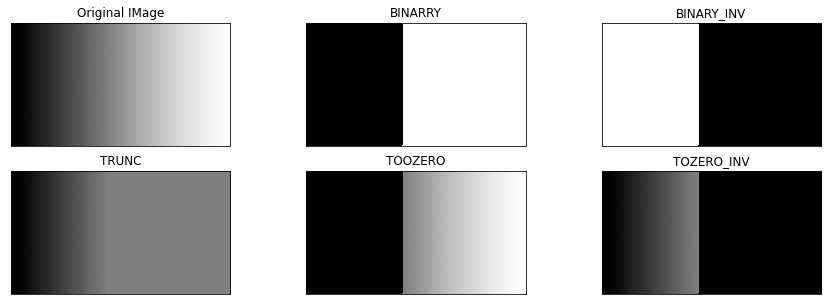

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 127          #Nilai threshold yang ditentukan

#1. thresh1 jika pixel di img > 127, maka thresh bernilai 1(putih) selain itu bernilai 0 (hitam)
ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)

#2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv.threshold(img, thresh,255,cv.THRESH_BINARY_INV)

#3. Threshold Truncate
ret, thresh3 = cv.threshold(img, thresh,255,cv.THRESH_TRUNC)

#4. Threshold Tozero
ret, thresh4 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO)

#5. Threshold Tozero Inverse
ret, thresh5 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original IMage', 'BINARRY', 'BINARY_INV', 'TRUNC', 'TOOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show


**Adaptive Threshold**

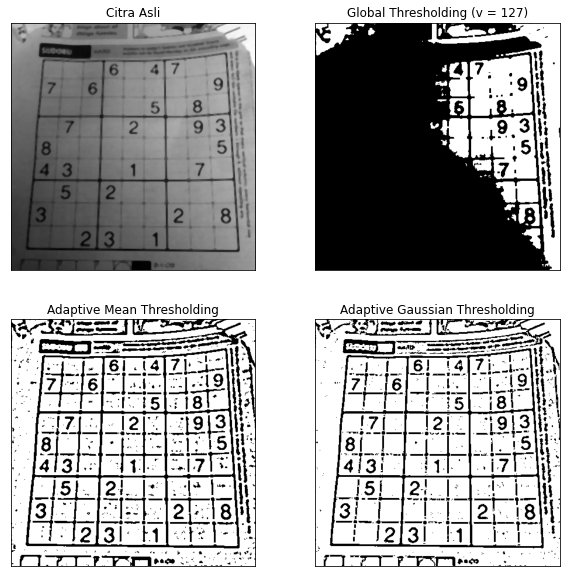

In [9]:
filename = ('/content/drive/MyDrive/PCVK/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray  = cv.medianBlur(gray,5)

thresh = 127
ret, th1 = cv.threshold(gray, thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)


titles = ['Citra Asli','Global Thresholding (v = 127)', 'Adaptive Mean Thresholding','Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(2,2,i+1), plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**Otsu’s Threshold**

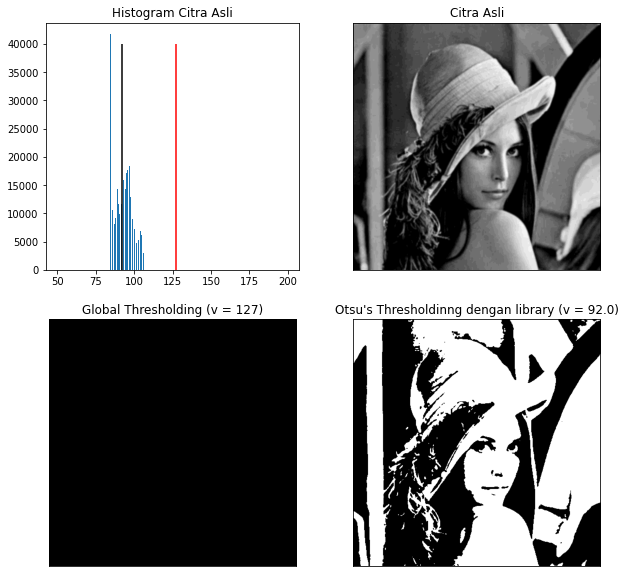

In [11]:
# Dengan library
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret, th1 = cv.threshold(blur, thresh,255,cv.THRESH_BINARY)
ret2, th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholdinng dengan library (v = ") + str(ret2)+")"
titles = ['Citra Asli','Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1), plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')  #garis vertikal merah menunjukkan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range (len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Hasil dari **threshold Otsu’s** **tanpa** Gaussian Filter dan dengan menggunakan **Gaussian Filter**.

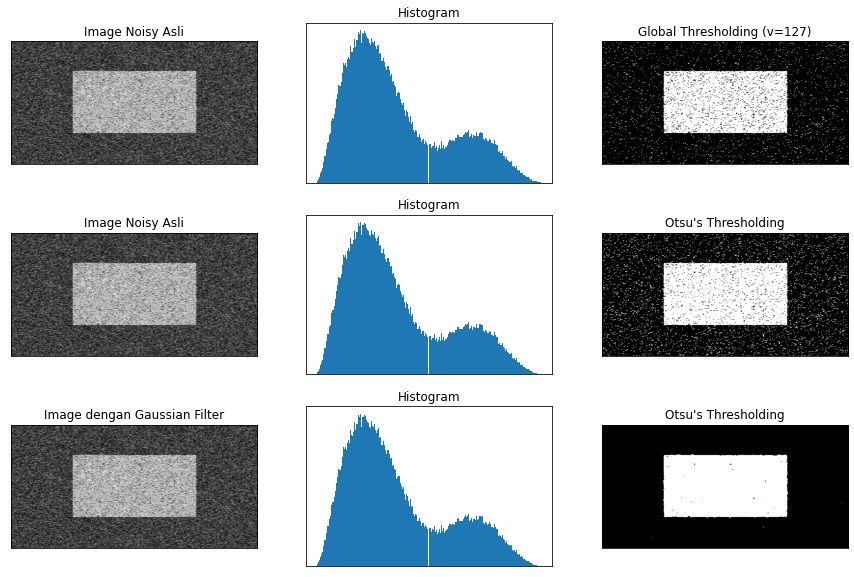

In [15]:
filename = ('/content/drive/MyDrive/PCVK/noisy2.png')
img = cv.imread(filename, 0)

#Global Thresholding
ret, th1 = cv.threshold(img, 127,255,cv.THRESH_BINARY)
#Otsu's Thresholding
ret2, th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          img, 0, th3]

titles = ['Image Noisy Asli','Histogram', 'Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram', "Otsu's Thresholding",
          'Image dengan Gaussian Filter','Histogram',"Otsu's Thresholding"]

plt.figure(figsize = (15,10))
for i in range (3):
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]),plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]),plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]),plt.yticks([])
plt.show()